In [29]:
using StatsBase, Distributions, Plots, JLD2

In [30]:
path = "./"
@load "radiotrack.jld2" t meansd semsd stdsd
t_rt = t 
msd_rt = meansd;
sem_rt = semsd;
std_rt = stdsd;

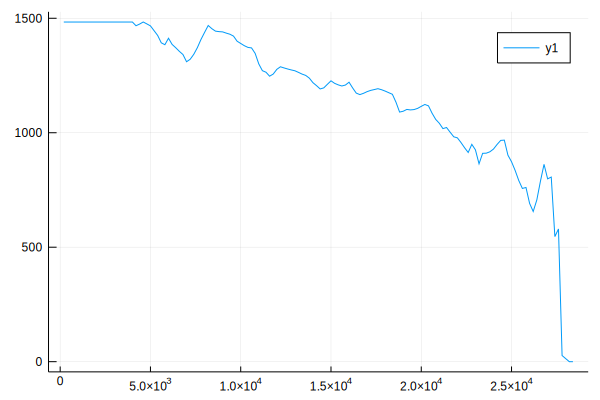

In [44]:
bound = sqrt.(2 .*msd_rt)
scatter(t_rt,bound)
bound[t_rt .< 4.2*10^3].=maximum(bound)
plot(t_rt, bound)

In [58]:
function bounded_diffusion_step(D,dt,x,y,R)
    x2 = x + rand(Normal(0,sqrt(2*D*dt)))
    y2 = y + rand(Normal(0,sqrt(2*D*dt)))
    dist = sqrt(x2^2 + y2^2)
    if dist > R
        difference = dist - R
        x2 = x2 - difference*x/dist
        y2 = y2 - difference*y/dist
    #    dist = sqrt(x2^2 + y2^2)
    end
    return x2, y2
end


function bounded_sim(D,t,N,start_time)
    R = 1500
    x = Array{Float64}(undef,N,length(t))
    x.=0
    y = Array{Float64}(undef,N,length(t))
    y.=0
    for (j,ts) in enumerate(t[1:end-1]) 
        R = bound[j]
        print(ts, "  ", bound[j], "\n")
        for i = 1:N
            x[i,j+1],y[i,j+1] = bounded_diffusion_step(D,dt,x[i,j],y[i,j],R)
        end
    end
    meansd = MSD(x,y)
    return meansd
end


function MSD(x,y)
    Dist = x .+ y
    SD = x.^2 .+ y.^2;
    meansd = Array{Float64}(undef,size(SD)[2])
    for i = 1:size(SD)[2]
        if length(SD[:,i][SD[:,i].!=0]) > 0  
            meansd[i] = mean(SD[:,i][SD[:,i].!=0])
        else
            meansd[i] = 0.0 
        end
    end
    return mean(SD,dims=1)
end


MSD (generic function with 1 method)

In [63]:
D = 65
start_time = 280
dt = 200.0
T = 3600*5
t = t_rt#start_time:dt:T-dt
N = 5000
tD = 4.2*10^3

meansd = bounded_sim(D,t,N,start_time)


200.0  1483.6896075620962
400.0  1483.6896075620962
600.0  1483.6896075620962
800.0  1483.6896075620962
1000.0  1483.6896075620962
1200.0  1483.6896075620962
1400.0  1483.6896075620962
1600.0  1483.6896075620962
1800.0  1483.6896075620962
2000.0  1483.6896075620962
2200.0  1483.6896075620962
2400.0  1483.6896075620962
2600.0  1483.6896075620962
2800.0  1483.6896075620962
3000.0  1483.6896075620962
3200.0  1483.6896075620962
3400.0  1483.6896075620962
3600.0  1483.6896075620962
3800.0  1483.6896075620962
4000.0  1483.6896075620962
4200.0  1467.3896994957443
4400.0  1474.633572390323
4600.0  1483.6896075620962
4800.0  1475.3931399021576
5000.0  1466.7110555986278
5200.0  1445.9403560551268
5400.0  1424.9591771221299
5600.0  1392.743500493108
5800.0  1384.5380504928914
6000.0  1412.7548895629743
6200.0  1385.772810068569
6400.0  1371.327824952835
6600.0  1355.512280649695
6800.0  1341.7307739399923
7000.0  1310.1328129318422
7200.0  1320.808334587245
7400.0  1342.569718902635
7600.0  1371

1×142 Array{Float64,2}:
 0.0  51836.6  1.02908e5  1.58114e5  2.07709e5  …  49176.5  50423.9  51815.9

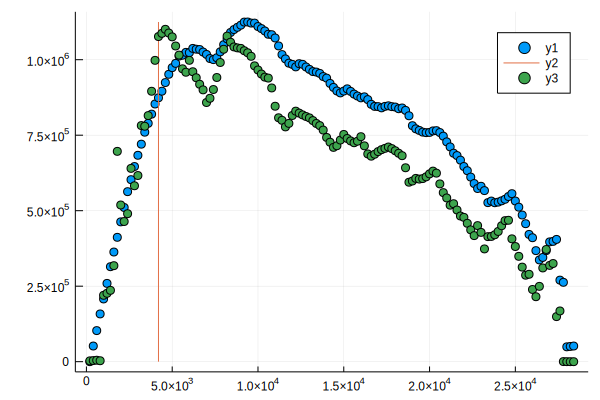

In [65]:
scatter(t, meansd')
plot!([tD,tD],[minimum(meansd),maximum(meansd)])
scatter!(t_rt, msd_rt)

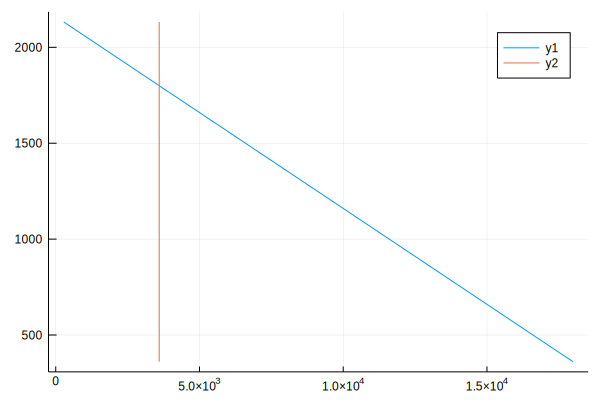

In [24]:
y = 0.5 .*tD .-0.1 .*(t.-tD)
plot(t, y)
plot!([tD,tD],[minimum(y),maximum(y)])